<img src="../part_of_cover_bakker_post.png" width="800px">

The Python code provided below is from <br>
**Analytical Groundwater Modeling: Theory and Applications Using Python** <br>
by *Mark Bakker and Vincent Post* <br>
ISBN 9781138029392

The book is published by CRC press and is available [here](https://www.routledge.com/Analytical-Groundwater-Modeling-Theory-and-Applications-using-Python/Bakker-Post/p/book/9781138029392).

This Notebook is provided under the [MIT license](https://github.com/pythongroundwaterbook/analytic_gw_book/blob/main/LICENSE). 

<p>© 2022 Mark Bakker and Vincent Post</p>

# Steady two-dimensional flow to wells

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same at tight_layout after every plot

## Radially symmetric flow on a circular island

<img src="figs/fig6.1.png" width=400>

In [2]:
# parameters
k = 5 # hydraulic conductivity, m/d
zb = 0 # bottom elevation of aquifer, m
N = 0.001 # areal recharge, m/d
R = 200 # radius of the island, m
hR = 10  # head at edge of island, m
rw = 0.3 # well radius, m
Qhalf = 0.5 * N * np.pi * R ** 2  # discharge is half total recharge, m^3/d
Qtotal = N * np.pi * R ** 2  # discharge equals total recharge, m^3/d

In [3]:
# solution
r = np.linspace(rw, R, 400)
PhiR = 0.5 * k * (hR - zb) ** 2
Phi2 = -0.25 * N * (r ** 2 - R ** 2) + PhiR
Phi3 = Phi2 + Qhalf / (2 * np.pi) * np.log(r / R)
hhalf = zb + np.sqrt(2 * Phi3 / k)
Phi3 = Phi2 + Qtotal / (2 * np.pi) * np.log(r / R)
htotal = zb + np.sqrt(2 * Phi3 / k)

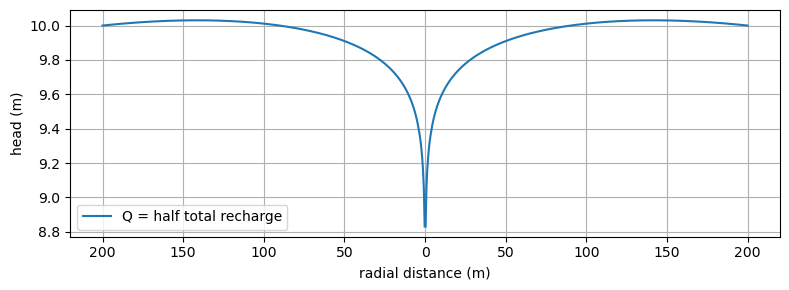

In [4]:
# basic plot head for half total discharge
plt.plot(-r, hhalf, 'C0', label='Q = half total recharge')
plt.plot(r, hhalf, 'C0')
plt.xticks(np.arange(-200, 201, 50), np.abs(np.arange(-200, 201, 50)))
plt.xlabel('radial distance (m)')
plt.ylabel('head (m)')
plt.grid()
plt.legend();

## Wells near rivers and impermeable boundaries

In [5]:
# parameters
xw = 0 # x-location of well, m
yw = 0 # y-location of well, m
Q = 100 # discharge of well, m^3/d

In [6]:
# solution
xg, yg = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
phi = Q / (4 * np.pi) * np.log(((xg - xw) ** 2 + (yg - yw) ** 2) / 100 ** 2)
psi = Q / (2 * np.pi) * np.arctan2(yg - yw, xg - xw)

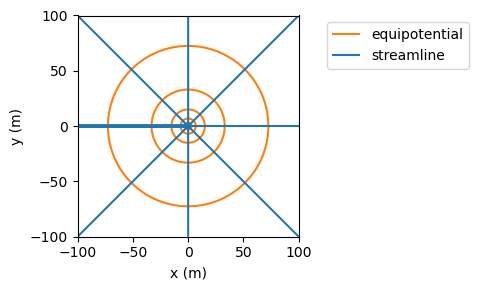

In [7]:
# basic flow net (right graph)
plt.subplot(111, aspect=1)
cs1 = plt.contour(xg, yg, phi, np.arange(phi.min(), phi.max(), Q / 8), colors='C1')
cs2 = plt.contour(xg, yg, psi, np.arange(-Q / 2, Q / 2, Q / 8), colors='C0')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
artists1, labels = cs1.legend_elements()
artists2, labels = cs2.legend_elements()
plt.legend([artists1[0], artists2[0]], ['equipotential', 'streamline'], bbox_to_anchor=(1.8, 1));

In [8]:
# parameters
T = 100 # transmissivity, m^2/d
hc = 0 # head at (0, 0)
d = 100 # half distance between the two wells, m
Q = [100, -100] # discharges of wells, m^3/d
xw = [-d, d] # x-locations of wells, m
yw = [0, 0] # y-locations of wells, m
phic = T * hc # discharge potential at origin, m^3/d

In [9]:
# solution
xg, yg = np.meshgrid(np.linspace(-200, 200, 100), np.linspace(-150, 150, 100))
pot = phic
psi = 0.0
Qx = 0.0
Qy = 0.0
for n in range(2):
    rsq = (xg - xw[n]) ** 2 + (yg - yw[n]) ** 2
    pot += Q[n] / (4 * np.pi) * np.log(rsq)
    psi += Q[n] / (2 * np.pi) * np.arctan2(yg - yw[n], xg - xw[n])
    Qx += -Q[n] / (2 * np.pi) * (xg - xw[n]) / rsq
    Qy += -Q[n] / (2 * np.pi) * (yg - yw[n]) / rsq

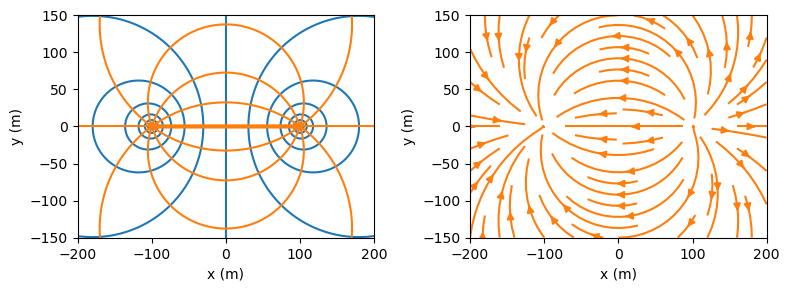

In [10]:
# basic plot
plt.figure(figsize=(8, 4))
plt.subplot(121, aspect=1)
plt.contour(xg, yg, pot, np.arange(phic - 100, phic + 100, 10), colors='C0')
plt.contour(xg, yg, psi, np.arange(-Q[0], Q[0], 10), colors='C1')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy, color='C1', density=0.7)
plt.xlabel('x (m)')
plt.ylabel('y (m)');

In [11]:
# changed parameters
Q = [100, 100] # discharge of well and image well, m^3/d

In [12]:
# solution
pot = 0.0
psi = 0.0
Qx = 0.0
Qy = 0.0
for n in range(2):
    rsq = (xg - xw[n]) ** 2 + (yg - yw[n]) ** 2
    pot += Q[n] / (4 * np.pi) * np.log(rsq) + phic
    psi += Q[n] / (2 * np.pi) * np.arctan2(yg - yw[n], xg - xw[n])
    Qx += -Q[n] / (2 * np.pi) * (xg - xw[n]) / rsq
    Qy += -Q[n] / (2 * np.pi) * (yg - yw[n]) / rsq

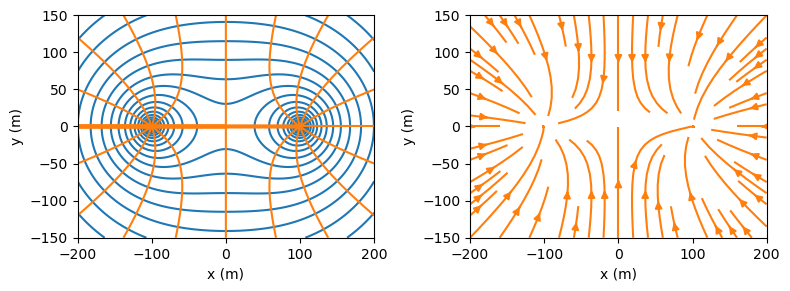

In [13]:
# basic plot
plt.figure(figsize=(8, 4))
plt.subplot(121, aspect=1)
plt.contour(xg, yg, pot, 20, colors='C0')
plt.contour(xg, yg, psi, 20, colors='C1')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy, color='C1', density=0.7)
plt.xlabel('x (m)')
plt.ylabel('y (m)');

In [14]:
# parameters
xw = [-100, 100, -100, 100] # x-locations of well and image wells, m
yw = [-50, -50, 50, 50] # y-locations of well and image wells, m
Qw = [100, 100, -100, -100] # discharge of well and image wells, m^3/d

In [15]:
# solution
xg, yg = np.meshgrid(np.linspace(-200, 0, 101), np.linspace(-150, 0, 101))
phi = 0
psi = 0
for n in range(4):
    phi += Qw[n] / (4 * np.pi) * np.log((xg - xw[n]) ** 2 + (yg - yw[n]) ** 2)
    psi += Qw[n] / (2 * np.pi) * np.arctan2(yg - yw[n], xg - xw[n])

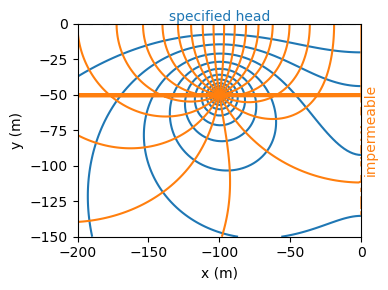

In [16]:
# flow net in right graph
plt.subplot(111, aspect=1)
plt.contour(xg, yg, phi, np.arange(-100, 100, 5), colors='C0')
plt.contour(xg, yg, psi, np.arange(-200, 200, 5), colors='C1')
plt.text(-100, 2, 'specified head', color='C0', ha='center')
plt.text(2, -75, 'impermeable', color='C1', rotation=90, va='center')
plt.xlabel('x (m)')
plt.ylabel('y (m)');

## Wells near an inhomogeneity boundary

In [17]:
# parameters
d = 100 # distance of well from inhomogeneity boundary, m
Q = 100 # discharge of well, m^3/d
TL = 100 # transmissivity on left side, m^2/d

In [18]:
# solution
def head_and_psi(x, y, TL, TR, d=100, Q=100):
    r0 = np.sqrt((x + d) ** 2 + y ** 2)
    r1 = np.sqrt((x - d) ** 2 + y ** 2)
    theta0 = np.arctan2(y, x + d)
    theta1 = np.arctan2(-y, d - x)
    if x < 0:
        h = Q / (2 * np.pi * TL) * np.log(r0 / r1) + \
            Q / (np.pi * (TL + TR)) * np.log(r1) 
        psi = Q / (2 * np.pi) * (theta0 - theta1) + \
            Q * TL / (np.pi * (TL + TR)) * theta1
    else:
        h = Q / (np.pi * (TL + TR)) * np.log(r0)
        psi = Q * TR / (np.pi * (TL + TR)) * theta0
    return h, psi

hpsifunc = np.vectorize(head_and_psi)

xg, yg = np.meshgrid(np.linspace(-200, 200, 100), np.linspace(-150, 150, 100))
ha, psia = hpsifunc(xg, yg, TL=TL, TR=TL / 5, d=d, Q=Q)
hb, psib = hpsifunc(xg, yg, TL=TL, TR=5 * TL, d=d, Q=Q)

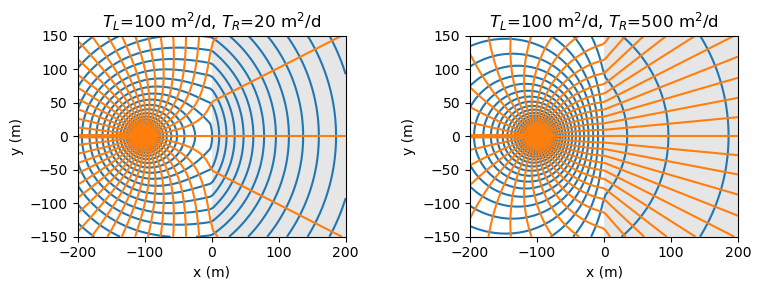

In [19]:
# basic plot
plt.subplot(121, aspect=1, title='$T_L$=100 m$^2$/d, $T_R$=20 m$^2$/d')
plt.contour(xg, yg, ha, 40, colors='C0')
plt.contour(xg, yg, psia, np.arange(-50, 50, 2.5), colors='C1')
plt.fill([0, 200, 200, 0], [-150, -150, 150, 150], fc=[.9, .9, .9])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.subplot(122, aspect=1, title='$T_L$=100 m$^2$/d, $T_R$=500 m$^2$/d')
plt.contour(xg, yg, hb, 40, colors='C0')
plt.contour(xg, yg, psib, np.arange(-50, 50, 2.5), colors='C1')
plt.fill([0, 200, 200, 0], [-150, -150, 150, 150], fc=[.9, .9, .9])
plt.xlabel('x (m)')
plt.ylabel('y (m)');

## Wells in a semi-confined aquifer

<img src="figs/fig6.2.png" width=400>

In [20]:
# parameters
T = 200 # transmissivity of bottom aquifer, m^2/d
c = 1000 # resistance of leaky layer, d
hstar = 0 # fixed head in top aquifer, m
rw = 0.3 # radius of the well, m
lab = np.sqrt(T * c) # leakage factor, m
Q = 500 # discharge of well, m^3/d

In [21]:
# solution
from scipy.special import k0, k1
r = np.linspace(rw, 4 * lab, 200)
h = -Q / (2 * np.pi * T) * k0(r / lab) + hstar
happrox = Q / (2 * np.pi * T) * np.log(r / (1.123 * lab)) + hstar
Qtot = 2 * np.pi * r * Q / (2 * np.pi * lab) * k1(r / lab)

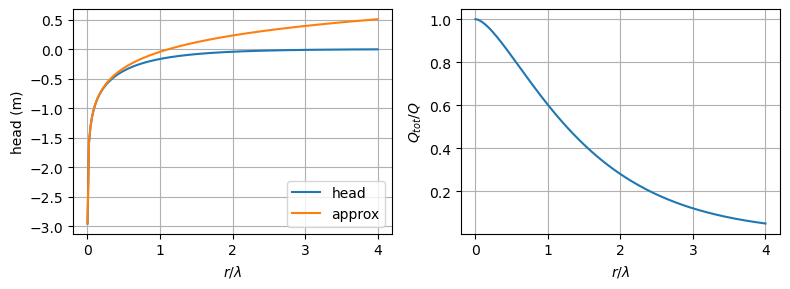

In [22]:
# basic plot
plt.subplot(121)
plt.plot(r / lab, h, label='head')
plt.plot(r / lab, happrox, label='approx')
plt.xlabel('$r/\lambda$')
plt.ylabel('head (m)')
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(r / lab, Qtot / Q)
plt.xlabel('$r/\lambda$')
plt.ylabel('$Q_{tot}/Q$')
plt.grid();

## Wells in a two-aquifer system

<img src="figs/fig6.3.png" width=400>

In [23]:
# parameters
T0 = 100 # transmissivity aquifer 0, m^2/d
T1 = 150 # transmissivity aquifer 1, m^2/d
c = 1000 # resistance of leaky layer, d
zaq = [0, -10, -15, -25] # elevation of top of layers and bottom, m
R = 200 # distance where head is fixed, m
hR = 5 # head at r=R, m
Q = 1000 # discharge of well, m^3/d
rw = 0.3 # radius of well, m
lab = np.sqrt(c * T0 * T1 / (T0 + T1)) # leakage factor, m

In [24]:
# solution
from scipy.special import k0, k1
r = np.linspace(rw, 5 * lab, 200)
h0 = Q / (2 * np.pi * (T0 + T1)) * (np.log(r / R) + \
     k0(r / lab) - k0(R / lab)) + hR
h1 = Q / (2 * np.pi * (T0 + T1)) * (np.log(r / R) + \
     T0 * k0(r / lab) / T1 - k0(R / lab)) + hR
Q0tot = -Q * T0 / (2 * np.pi * (T0 + T1)) * (1 / r -
         k1(r / lab) / lab) * 2 * np.pi * r
Q1tot = -Q * T1 / (2 * np.pi * (T0 + T1)) * (1 / r + 
         T0 * k1(r / lab) / (T1 * lab)) * 2 * np.pi * r
psi = np.zeros((len(zaq), len(r)))
psi[1] = Q0tot
psi[2] = Q0tot
psi[3] = Q1tot + Q0tot

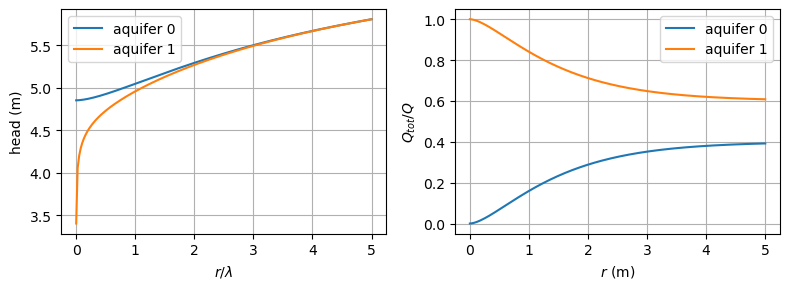

In [25]:
# basic plot head and flow
plt.subplot(121)
plt.plot(r / lab, h0, label='aquifer 0')
plt.plot(r / lab, h1, label='aquifer 1')
plt.xlabel('$r/\lambda$')
plt.ylabel('head (m)')
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(r / lab, -Q0tot / Q, label='aquifer 0')
plt.plot(r / lab, -Q1tot / Q, label='aquifer 1')
plt.xlabel('$r$ (m)')
plt.ylabel('$Q_{tot} / Q$')
plt.grid()
plt.legend();

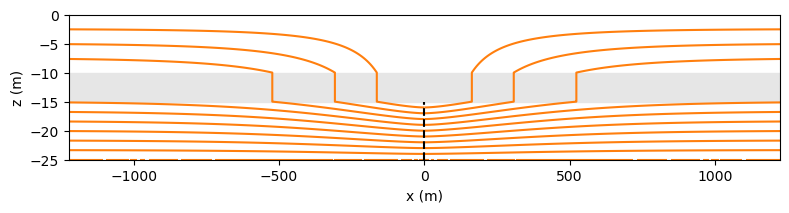

In [26]:
plt.subplot(aspect=20)
plt.contour(r, zaq, psi, 10, colors='C1')
plt.contour(-r, zaq, psi, 10, colors='C1')
plt.fill([-r[-1], r[-1], r[-1], -r[-1]], [-15, -15, -10, -10], color=[.9, .9, .9])
plt.plot([0, 0], [-25, -15], 'k--')
plt.xlabel('x (m)')
plt.ylabel('z (m)');